# CPSC5175 Final Project - Political Persuasion 
## Case Study 21.4
#### Jamion Williams

In [1]:
# Programmatic control space for necessary libraries

library(ggplot2)
library(caret)
library(dplyr)
install.packages('heatmaply')
library(heatmaply)
install.packages('gains')
library(gains)

# Problem child
install.packages('uplift')
library(uplift)

Loading required package: lattice


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: plotly


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


Loading required package: viridis

Loading required package: viridisLite

Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus


Welcome to heatmaply version 1.1.0

Type citation('heatmaply') for how to cite the package.
Type ?heatmaply for the main documentation.

The github page is: https://github.com/talgalili/heatmaply/
Please submit your suggestions and bug-

In [2]:
# Import the dataset into a raw data format

raw.df <- read.csv("Datasets/Voter-Persuasion-2.csv",header = TRUE)

In [3]:
# Space to interrogate the raw data

print("What columns and first few values exist in the data?")
str(raw.df)

print("What are the first few rows of the data?")
head(raw.df)

print("Are there any null values within the data?")
anyNA(raw.df)

print("For programmatic completeness, what are the 'true' names of the data attributes?")
colnames(raw.df)

[1] "What columns and first few values exist in the data?"
'data.frame':	10000 obs. of  78 variables:
 $ VOTER_ID      : int  193801 627701 306924 547609 141105 334787 431906 618337 84502 316168 ...
 $ SET_NO        : int  2 1 2 1 3 1 1 3 3 3 ...
 $ OPP_SEX       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AGE           : int  28 53 68 66 23 49 59 37 23 62 ...
 $ HH_ND         : int  1 2 2 0 0 2 2 0 1 1 ...
 $ HH_NR         : int  1 0 1 2 3 0 0 1 2 0 ...
 $ HH_NI         : int  1 0 0 0 1 0 0 1 3 1 ...
 $ MED_AGE       : int  37 46 41 35 42 32 50 53 32 37 ...
 $ NH_WHITE      : int  61 87 23 53 74 64 82 97 67 54 ...
 $ NH_AA         : int  34 8 64 29 18 30 0 2 12 37 ...
 $ NH_ASIAN      : int  0 0 7 4 0 4 0 0 14 1 ...
 $ NH_MULT       : int  0 0 2 0 0 0 1 0 2 7 ...
 $ HISP          : int  4 5 3 3 8 2 17 1 5 2 ...
 $ COMM_LT10     : int  26 10 5 27 6 4 7 16 9 21 ...
 $ COMM_609P     : int  2 1 7 4 12 8 2 0 5 5 ...
 $ MED_HH_INC    : int  59954 56196 58950 54809 75063 81506 75577 94196 125154 50446

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,NH_WHITE,NH_AA,⋯,CAND1S,CAND2S,Flyer,Flyer.reversed,I3,CAND1_UND,CAND2_UND,MOVED_AD,opposite,Partition
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>
1,193801,2,0,28,1,1,1,37,61,34,⋯,S,S,1,0,N,N,N,N,1,V
2,627701,1,0,53,2,0,0,46,87,8,⋯,S,S,1,0,N,N,N,N,1,T
3,306924,2,0,68,2,1,0,41,23,64,⋯,S,L,1,0,N,N,N,Y,0,T
4,547609,1,0,66,0,2,0,35,53,29,⋯,S,S,1,0,N,N,N,N,1,T
5,141105,3,0,23,0,3,1,42,74,18,⋯,S,S,1,0,N,N,N,N,1,T
6,334787,1,0,49,2,0,0,32,64,30,⋯,U,S,1,0,N,Y,N,Y,0,T


[1] "Are there any null values within the data?"


[1] FALSE

[1] "For programmatic completeness, what are the 'true' names of the data attributes?"


[1] "VOTER_ID"       "SET_NO"         "OPP_SEX"        "AGE"           
 [5] "HH_ND"          "HH_NR"          "HH_NI"          "MED_AGE"       
 [9] "NH_WHITE"       "NH_AA"          "NH_ASIAN"       "NH_MULT"       
[13] "HISP"           "COMM_LT10"      "COMM_609P"      "MED_HH_INC"    
[17] "COMM_CAR"       "COMM_CP"        "COMM_PT"        "COMM_WALK"     
[21] "KIDS"           "M_MAR"          "F_MAR"          "ED_4COL"       
[25] "GENDER_F"       "GENDER_M"       "H_AFDLN3P"      "H_F1"          
[29] "H_M1"           "H_MFDLN3P"      "PARTY_D"        "PARTY_I"       
[33] "PARTY_R"        "VPP_08"         "VPP_12"         "VPR_08"        
[37] "VPR_10"         "VPR_12"         "VG_04"          "VG_06"         
[41] "VG_08"          "VG_10"          "VG_12"          "PP_PELIG"      
[45] "PR_PELIG"       "AP_PELIG"       "G_PELIG"        "E_PELIG"       
[49] "NL5G"           "NL3PR"          "NL5AP"          "NL2PP"         
[53] "REG_DAYS"       "UPSCALEBUY"     "UPSCALEMAL"     "UPSCALEFEM"    
[57] "BOOKBUYERI"     "FAMILYMAGA"     "FEMALEORIE"     "RELIGIOUSM"    
[61] "GARDENINGM"     "CULINARYIN"     "HEALTHFITN"     "DOITYOURSE"    
[65] "FINANCIALM"     "RELIGIOUSC"     "POLITICALC"     "MEDIANEDUC"    
[69] "CAND1S"         "CAND2S"         "Flyer"          "Flyer.reversed"
[73] "I3"             "CAND1_UND"      "CAND2_UND"      "MOVED_AD"      
[77] "opposite"       "Partition"

### 1) Overall, how did the flyer do in moving voters in a Democratic direction?

In [4]:
# To start, I want to see the bivariate relationship between the target (MOVED_AD) and the FLYER variable

# Let's preprocess and confirm our valid values
pre.df <- raw.df

# add a categorized version of Flyer for nonlinear modelling
pre.df$FlyerFactor <- factor(raw.df$Flyer)

#confirm data levels 
levels(pre.df$MOVED_AD)
levels(pre.df$FlyerFactor)

#place them in a tiny dataset
tiny.df <- as.data.frame(pre.df$MOVED_AD)
tiny.df$Flyer <- pre.df$Flyer

colnames(tiny.df) <- c("Moved","Flyer")

#this will show us just the two elements next to each other
head(tiny.df)

[1] "N" "Y"

[1] "0" "1"

,Moved,Flyer
,<fct>,<int>
1,N,1
2,N,1
3,Y,1
4,N,1
5,N,1
6,Y,1


     Flyer
Moved    0    1
    N 3278 2988
    Y 1722 2012

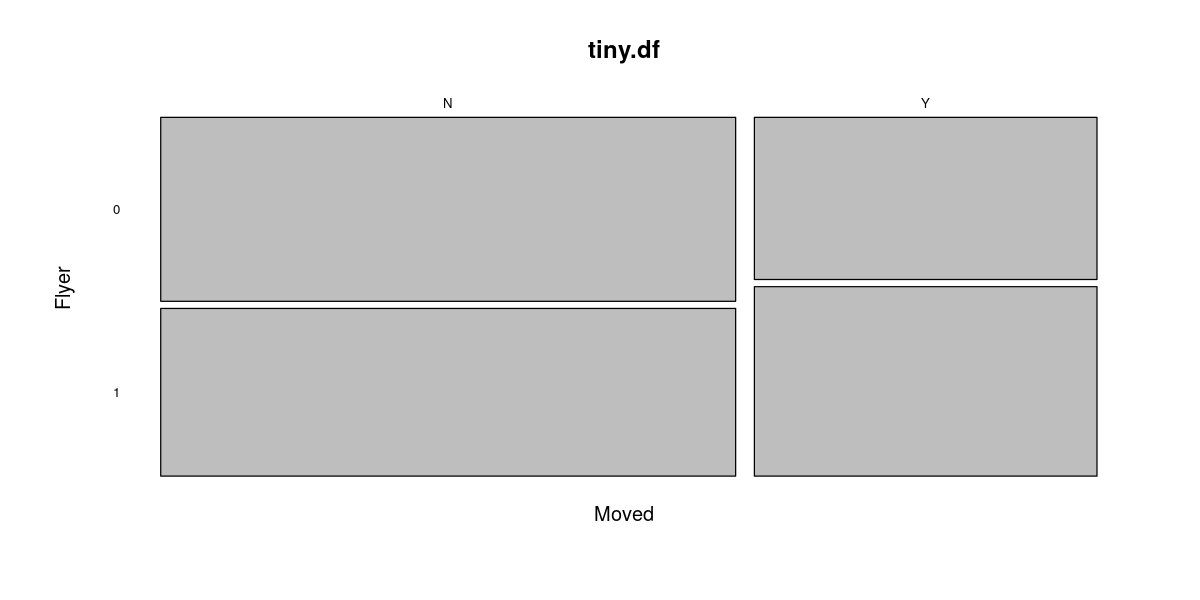

In [5]:
options(repr.plot.width=10, repr.plot.height=5)

mosaicplot(Moved ~ ., data = tiny.df, las = 1)

table(tiny.df)

In [6]:
# So, considering that the flyer "moved" 20% of the total sample, and 40% of recipients, the flyer seems to be very effective!

### 2) Explore the data to examine relationships between predictor variables, using data visualization Which of the predictors have good predictive potential?

In [7]:
# let's do some analysis of the individual columns to find which are pretinent or appropriately normalized for prediction

summary(pre.df)

    VOTER_ID          SET_NO         OPP_SEX             AGE        
 Min.   :    13   Min.   :1.000   Min.   : 0.0000   Min.   : 18.00  
 1st Qu.:152718   1st Qu.:1.000   1st Qu.: 0.0000   1st Qu.: 36.00  
 Median :310684   Median :2.000   Median : 0.0000   Median : 51.00  
 Mean   :313104   Mean   :2.006   Mean   : 0.5874   Mean   : 50.87  
 3rd Qu.:470628   3rd Qu.:3.000   3rd Qu.: 0.0000   3rd Qu.: 64.00  
 Max.   :636334   Max.   :3.000   Max.   :86.0000   Max.   :100.00  
     HH_ND           HH_NR            HH_NI          MED_AGE     
 Min.   :0.000   Min.   :0.0000   Min.   :0.000   Min.   :25.00  
 1st Qu.:0.000   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:34.00  
 Median :1.000   Median :0.0000   Median :0.000   Median :38.00  
 Mean   :1.212   Mean   :0.7287   Mean   :0.612   Mean   :39.16  
 3rd Qu.:2.000   3rd Qu.:1.0000   3rd Qu.:1.000   3rd Qu.:44.00  
 Max.   :9.000   Max.   :9.0000   Max.   :9.000   Max.   :65.00  
    NH_WHITE         NH_AA          NH_ASIAN         NH

In [8]:
# Going to try to dummy up some of the non-numeric values

# Don't want to include columns with ridiculous dummies, inversed of the predictor (we'll use that later), or overwhelming to dummies
drops <- c("VOTER_ID","FlyerFactor","Partition","opposite","Flyer.reversed")
dummypre.df <- pre.df[,!(names(pre.df) %in% drops)]

# dummy everything else but the target
dummies <- dummyVars(MOVED_AD ~ ., data = dummypre.df)  
dummy.set <- data.frame(predict(dummies, newdata = dummypre.df))

# the below is to swap N to 0 and Y to 1
dummy.set$MOVED_AD <- as.factor(as.numeric(raw.df$MOVED_AD) - 1)

head(dummy.set)

Warning message in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$lvls):
“variable 'MOVED_AD' is not a factor”


,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,NH_WHITE,NH_AA,NH_ASIAN,⋯,CAND2S.S,CAND2S.U,Flyer,I3.N,I3.Y,CAND1_UND.N,CAND1_UND.Y,CAND2_UND.N,CAND2_UND.Y,MOVED_AD
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,2,0,28,1,1,1,37,61,34,0,⋯,1,0,1,1,0,1,0,1,0,0
2,1,0,53,2,0,0,46,87,8,0,⋯,1,0,1,1,0,1,0,1,0,0
3,2,0,68,2,1,0,41,23,64,7,⋯,0,0,1,1,0,1,0,1,0,1
4,1,0,66,0,2,0,35,53,29,4,⋯,1,0,1,1,0,1,0,1,0,0
5,3,0,23,0,3,1,42,74,18,0,⋯,1,0,1,1,0,1,0,1,0,0
6,1,0,49,2,0,0,32,64,30,4,⋯,1,0,1,1,0,0,1,1,0,1


In [9]:
# This is the raw correlation matrix when only numeric values are selected

round(cor(select_if(pre.df, is.numeric)),2)

# And, the correlation matrix on the dummy set

round(cor(dummy.set),2)

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,NH_WHITE,NH_AA,⋯,CULINARYIN,HEALTHFITN,DOITYOURSE,FINANCIALM,RELIGIOUSC,POLITICALC,MEDIANEDUC,Flyer,Flyer.reversed,opposite
VOTER_ID,1.00,0.00,0.01,0.00,-0.02,0.02,-0.01,0.00,-0.01,0.01,⋯,0.01,-0.01,0.00,0.00,0.01,0.02,0.01,-0.02,0.02,0.00
SET_NO,0.00,1.00,0.00,-0.01,0.00,-0.02,0.01,0.02,0.01,0.00,⋯,0.00,0.00,0.00,0.00,-0.01,-0.01,0.00,-0.01,0.01,-0.01
OPP_SEX,0.01,0.00,1.00,0.01,0.00,0.02,0.00,0.00,0.01,0.00,⋯,-0.01,0.00,-0.01,0.02,0.00,0.00,0.01,-0.01,0.01,0.01
AGE,0.00,-0.01,0.01,1.00,-0.11,-0.03,-0.09,0.10,0.07,-0.07,⋯,0.09,0.08,0.10,0.08,0.00,0.02,0.03,0.01,-0.01,0.03
HH_ND,-0.02,0.00,0.00,-0.11,1.00,-0.28,-0.07,-0.08,-0.17,0.17,⋯,-0.04,0.01,-0.04,-0.06,0.03,0.03,-0.08,-0.02,0.02,-0.26
HH_NR,0.02,-0.02,0.02,-0.03,-0.28,1.00,0.02,0.04,0.11,-0.09,⋯,0.02,0.00,0.01,0.04,0.00,-0.01,0.07,0.01,-0.01,0.28
HH_NI,-0.01,0.01,0.00,-0.09,-0.07,0.02,1.00,-0.02,0.05,-0.05,⋯,-0.01,-0.01,-0.01,0.01,0.03,0.02,0.06,-0.01,0.01,-0.03
MED_AGE,0.00,0.02,0.00,0.10,-0.08,0.04,-0.02,1.00,0.44,-0.31,⋯,0.03,-0.01,0.03,0.13,-0.01,0.00,0.15,-0.01,0.01,0.01
NH_WHITE,-0.01,0.01,0.01,0.07,-0.17,0.11,0.05,0.44,1.00,-0.91,⋯,0.02,0.01,0.02,0.23,0.06,0.07,0.40,0.00,0.00,0.10
NH_AA,0.01,0.00,0.00,-0.07,0.17,-0.09,-0.05,-0.31,-0.91,1.00,⋯,-0.02,-0.01,-0.02,-0.23,-0.02,-0.03,-0.37,-0.01,0.01,-0.08


,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,NH_WHITE,NH_AA,NH_ASIAN,⋯,CAND2S.S,CAND2S.U,Flyer,I3.N,I3.Y,CAND1_UND.N,CAND1_UND.Y,CAND2_UND.N,CAND2_UND.Y,MOVED_AD
SET_NO,1.00,0.00,-0.01,0.00,-0.02,0.01,0.02,0.01,0.00,-0.01,⋯,0.00,0.00,-0.01,-0.02,0.02,-0.01,0.01,0.00,0.00,0.01
OPP_SEX,0.00,1.00,0.01,0.00,0.02,0.00,0.00,0.01,0.00,0.01,⋯,0.00,0.00,-0.01,0.00,0.00,0.01,-0.01,0.00,0.00,-0.01
AGE,-0.01,0.01,1.00,-0.11,-0.03,-0.09,0.10,0.07,-0.07,-0.01,⋯,-0.01,0.00,0.01,0.07,-0.07,-0.07,0.07,0.00,0.00,-0.03
HH_ND,0.00,0.00,-0.11,1.00,-0.28,-0.07,-0.08,-0.17,0.17,0.05,⋯,-0.03,0.02,-0.02,0.28,-0.28,-0.25,0.25,-0.02,0.02,0.26
HH_NR,-0.02,0.02,-0.03,-0.28,1.00,0.02,0.04,0.11,-0.09,-0.03,⋯,0.15,-0.09,0.01,0.19,-0.19,0.27,-0.27,0.09,-0.09,-0.28
HH_NI,0.01,0.00,-0.09,-0.07,0.02,1.00,-0.02,0.05,-0.05,0.03,⋯,-0.09,0.06,-0.01,-0.59,0.59,0.07,-0.07,-0.06,0.06,0.03
MED_AGE,0.02,0.00,0.10,-0.08,0.04,-0.02,1.00,0.44,-0.31,-0.29,⋯,-0.02,0.01,-0.01,-0.01,0.01,0.01,-0.01,-0.01,0.01,-0.01
NH_WHITE,0.01,0.01,0.07,-0.17,0.11,0.05,0.44,1.00,-0.91,-0.06,⋯,-0.02,0.00,0.00,-0.06,0.06,0.03,-0.03,0.00,0.00,-0.10
NH_AA,0.00,0.00,-0.07,0.17,-0.09,-0.05,-0.31,-0.91,1.00,0.01,⋯,0.02,0.00,-0.01,0.06,-0.06,-0.04,0.04,0.00,0.00,0.08
NH_ASIAN,-0.01,0.01,-0.01,0.05,-0.03,0.03,-0.29,-0.06,0.01,1.00,⋯,-0.02,0.01,0.01,0.00,0.00,-0.02,0.02,-0.01,0.01,0.06


In [ ]:
# But, let's get a picture of how the data interrelates visually.
#  heatmaply is a plugin that allows you to zoom and pan around and look at labels within the data.
#  Give it a shot using the key in the upper right hand!

# !!!!!!!!!!!!!!!!
#
#    JAMES DON'T RUN THIS PART IT WILL CRASH YOUR MACHINE
#    LOOK AT MY NOTEBOOK IN AZURE INSTEAD FOR THIS PART
#
# !!!!!!!!!!!!!!


r <- round(cor(dummy.set),2)

heatmaply_cor(
  r,
  label_names = c("x", "y", "Correlation"),
  showticklabels = c(T,F)
)

Looking at the above, we have several potential predictors:

CAND1_UNDY

CAND1S

CAND2S

GENDER

VPP_08

### 3) Partition the data into training and validation according to the provided indicator and fit a predictive model.

In [9]:
# Since I've already made some predictor decisions above, I'm going to take advantage of the dummy set variables 
#  and run a KNN on the data. First off is the separation into training and test

# First, let's add the partition variable back in
dummy.set$Partition <- pre.df$Partition

summary(dummy.set$Partition)

T    V 
5948 4052

In [62]:
# Test/Train split (not using the seed since the values are predefined)

train.df <- dummy.set[dummy.set$Partition == 'T',!(names(dummy.set) == 'Partition')]
test.df <- dummy.set[dummy.set$Partition == 'V',!(names(dummy.set) == 'Partition')]

dim(train.df)
dim(test.df)

[1] 5948   81

[1] 4052   81

In [63]:
# Fit the model using caret and KNN

ctrl <- trainControl(method="repeatedcv", repeats= 3)

knnFit <- train(
    MOVED_AD ~ .,
    data = train.df,
    method = "knn",
    preProcess = c("center", "scale"),
    trControl = ctrl,
    tuneLength = 10
)

knnFit

k-Nearest Neighbors 

5948 samples
  80 predictor
   2 classes: '0', '1' 

Pre-processing: centered (80), scaled (80) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 5354, 5352, 5353, 5353, 5353, 5353, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.8822024  0.7481051
   7  0.8845006  0.7529242
   9  0.8837162  0.7514983
  11  0.8819800  0.7475428
  13  0.8799620  0.7430565
  15  0.8793457  0.7417523
  17  0.8778882  0.7385896
  19  0.8761523  0.7347660
  21  0.8755352  0.7333789
  23  0.8743578  0.7308548

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 7.

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2361  223
         1  210 1258
                                          
               Accuracy : 0.8931          
                 95% CI : (0.8832, 0.9025)
    No Information Rate : 0.6345          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7692          
                                          
 Mcnemar's Test P-Value : 0.5642          
                                          
            Sensitivity : 0.8494          
            Specificity : 0.9183          
         Pos Pred Value : 0.8569          
         Neg Pred Value : 0.9137          
             Prevalence : 0.3655          
         Detection Rate : 0.3105          
   Detection Prevalence : 0.3623          
      Balanced Accuracy : 0.8839          
                                          
       'Positive' Class : 1               
                        

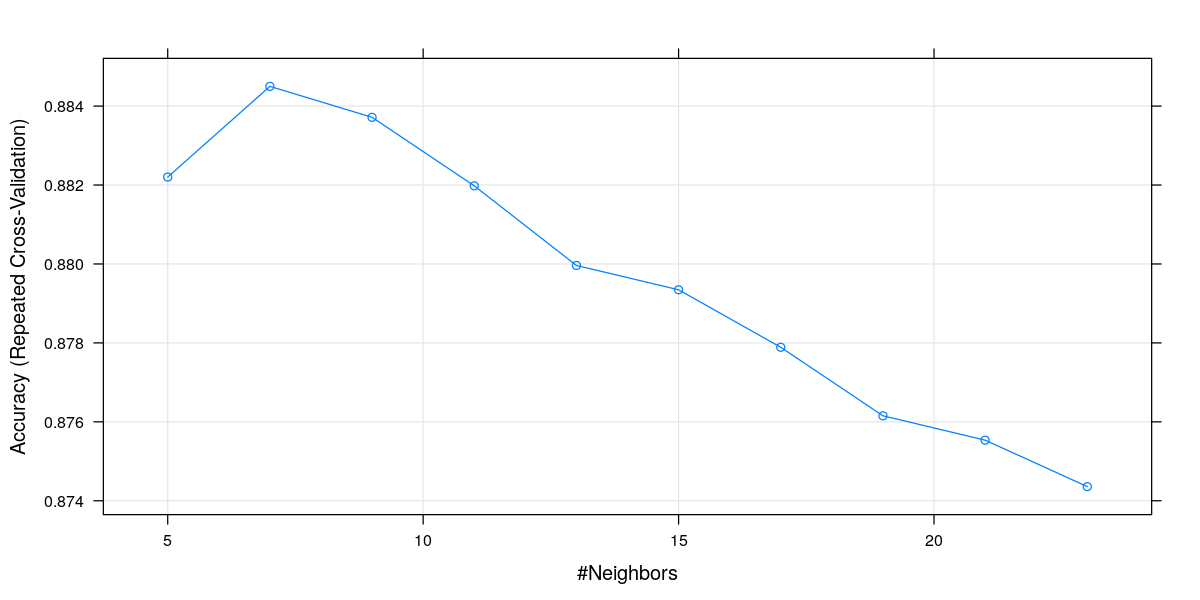

In [64]:
# let's see how that works out in a confusion matrix

test.results <- predict(knnFit, test.df)

confusionMatrix(test.results, test.df$MOVED_AD, positive = '1')

plot(knnFit)

### 4) Explain your choice in model.

##### For this model, considering the vast amount of variables, my choices (in my head) were classical linear regression using PCA, or KNN. In order to reduce multicollinearity and provide a more data-centric model, I chose KNN. While accuracy is not as high as I would like it, it does show high accuracy at k=7. I'd like to use this space to explore the predictive lift:

### 5) Using the model, report propensities for the first three records in the validation set.

In [10]:
# Carve out the first three records as requested

first.three <- test.df[1:3,]

dim(first.three)

[1]  3 81

In [17]:
first.three.results <- predict(knnFit, first.three)

confusionMatrix(first.three.results, first.three$MOVED_AD, positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction 0 1
         0 2 1
         1 0 0
                                          
               Accuracy : 0.6667          
                 95% CI : (0.0943, 0.9916)
    No Information Rate : 0.6667          
    P-Value [Acc > NIR] : 0.7407          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : 1.0000          
                                          
            Sensitivity : 0.0000          
            Specificity : 1.0000          
         Pos Pred Value :    NaN          
         Neg Pred Value : 0.6667          
             Prevalence : 0.3333          
         Detection Rate : 0.0000          
   Detection Prevalence : 0.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : 1               
                                          

### 6) Run the model again, but with the Flyer-reversed predictor variable.

In [11]:
# Repeat most of the steps of data prep that we did before

# Remove "Flyer" and include "Flyer-reversed"
drops <- c("VOTER_ID","FlyerFactor","Partition","opposite","Flyer")
dummypre.df <- pre.df[,!(names(pre.df) %in% drops)]

# dummy everything else but the target
dummies <- dummyVars(MOVED_AD ~ ., data = dummypre.df)  
dummy.set.reversed <- data.frame(predict(dummies, newdata = dummypre.df))

# the below is to swap N to 0 and Y to 1
dummy.set.reversed$MOVED_AD <- as.numeric(raw.df$MOVED_AD) - 1

dummy.set.reversed$Partition <- pre.df$Partition

summary(dummy.set.reversed)

Warning message in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$lvls):
“variable 'MOVED_AD' is not a factor”


     SET_NO         OPP_SEX             AGE             HH_ND      
 Min.   :1.000   Min.   : 0.0000   Min.   : 18.00   Min.   :0.000  
 1st Qu.:1.000   1st Qu.: 0.0000   1st Qu.: 36.00   1st Qu.:0.000  
 Median :2.000   Median : 0.0000   Median : 51.00   Median :1.000  
 Mean   :2.006   Mean   : 0.5874   Mean   : 50.87   Mean   :1.212  
 3rd Qu.:3.000   3rd Qu.: 0.0000   3rd Qu.: 64.00   3rd Qu.:2.000  
 Max.   :3.000   Max.   :86.0000   Max.   :100.00   Max.   :9.000  
     HH_NR            HH_NI          MED_AGE         NH_WHITE    
 Min.   :0.0000   Min.   :0.000   Min.   :25.00   Min.   :23.00  
 1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:34.00   1st Qu.:58.00  
 Median :0.0000   Median :0.000   Median :38.00   Median :65.00  
 Mean   :0.7287   Mean   :0.612   Mean   :39.16   Mean   :66.37  
 3rd Qu.:1.0000   3rd Qu.:1.000   3rd Qu.:44.00   3rd Qu.:85.00  
 Max.   :9.0000   Max.   :9.000   Max.   :65.00   Max.   :99.00  
     NH_AA          NH_ASIAN         NH_MULT           HISP   

In [12]:
# Test/Train split (not using the seed since the values are predefined)

dummy.set.reversed$MOVED_AD <- as.factor(dummy.set.reversed$MOVED_AD)

train.df.reversed <- dummy.set.reversed[dummy.set.reversed$Partition == 'T',!(names(dummy.set.reversed) == 'Partition')]
test.df.reversed <- dummy.set.reversed[dummy.set.reversed$Partition == 'V',!(names(dummy.set.reversed) == 'Partition')]

dim(train.df.reversed)
dim(test.df.reversed)

[1] 5948   81

[1] 4052   81

In [20]:
# Fit the Reversed model using caret and KNN

ctrl <- trainControl(method="repeatedcv", repeats= 3)

knnFitReversed <- train(
    MOVED_AD ~ .,
    data = train.df.reversed,
    method = "knn",
    preProcess = c("center", "scale"),
    trControl = ctrl,
    tuneLength = 10
)

knnFitReversed

k-Nearest Neighbors 

5948 samples
  80 predictor
   2 classes: '0', '1' 

Pre-processing: centered (80), scaled (80) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 5353, 5354, 5353, 5353, 5353, 5352, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.8829345  0.7497198
   7  0.8829888  0.7497516
   9  0.8832676  0.7504526
  11  0.8820342  0.7476545
  13  0.8813619  0.7462000
  15  0.8799050  0.7429341
  17  0.8762615  0.7350852
  19  0.8760386  0.7345599
  21  0.8734044  0.7287205
  23  0.8723398  0.7265142

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 9.

In [23]:
# Carve out the first three records as requested

first.three.reversed <- test.df.reversed[4050:4052,]

dim(first.three.reversed)

first.three.results.reversed <- predict(knnFitReversed, first.three.reversed)

confusionMatrix(first.three.results.reversed, first.three.reversed$MOVED_AD, positive = "1")

[1]  3 81

Confusion Matrix and Statistics

          Reference
Prediction 0 1
         0 2 0
         1 0 1
                                     
               Accuracy : 1          
                 95% CI : (0.2924, 1)
    No Information Rate : 0.6667     
    P-Value [Acc > NIR] : 0.2963     
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.3333     
         Detection Rate : 0.3333     
   Detection Prevalence : 0.3333     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 1          
                                     

### 7) Compute uplift for the validation set and report uplift for the first three records

In [10]:
dummy.pre <- dummy.set
dummy.pre$MOVED_AD = ifelse(dummy.set$MOVED_AD == "1",1,0)

# The below creates special variables for uplift modelling (from https://cran.r-project.org/web/packages/uplift/uplift.pdf)

rvtu.df <- rvtu(MOVED_AD ~ . + trt(Flyer),
                data = dummy.pre,
                method = "none"
               )

head(rvtu.df)

,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,NH_WHITE,NH_AA,NH_ASIAN,⋯,I3.N,I3.Y,CAND1_UND.N,CAND1_UND.Y,CAND2_UND.N,CAND2_UND.Y,Partition,ct,y,z
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
1,2,0,28,1,1,1,37,61,34,0,⋯,1,0,1,0,1,0,V,1,0,0
2,1,0,53,2,0,0,46,87,8,0,⋯,1,0,1,0,1,0,T,1,0,0
3,2,0,68,2,1,0,41,23,64,7,⋯,1,0,1,0,1,0,T,1,1,1
4,1,0,66,0,2,0,35,53,29,4,⋯,1,0,1,0,1,0,T,1,0,0
5,3,0,23,0,3,1,42,74,18,0,⋯,1,0,1,0,1,0,T,1,0,0
6,1,0,49,2,0,0,32,64,30,4,⋯,1,0,0,1,1,0,T,1,1,1


In [11]:
# Test/Train split (not using the seed since the values are predefined)

train.df <- rvtu.df[rvtu.df$Partition == 'T',!(names(rvtu.df) == 'Partition')]
test.df <- rvtu.df[rvtu.df$Partition == 'V',!(names(rvtu.df) == 'Partition')]

dim(train.df)
dim(test.df)

[1] 5948   83

[1] 4052   83

In [12]:
set.seed(420)

#utrain.df <- sample_n(train.df,100)
#utest.df <- sample_n(test.df,80)

KNNUpliftFit <- upliftKNN(
    train.df,
    test.df,
    train.df$z,
    train.df$ct,
    k=7,
    dist.method = "euclidean",
    p=2,
    ties.meth = "min", 
    agg.method = "majority"
)

dim(KNNUpliftFit)
predict.df <- data.frame(KNNUpliftFit, "uplift" = KNNUpliftFit[,1] - KNNUpliftFit[,2])
test.df$UPLIFT <- predict.df$uplift

[1] 4052    2

In [13]:
summary(test.df)

     SET_NO        OPP_SEX             AGE             HH_ND      
 Min.   :1.00   Min.   : 0.0000   Min.   : 18.00   Min.   :0.000  
 1st Qu.:1.00   1st Qu.: 0.0000   1st Qu.: 36.00   1st Qu.:0.000  
 Median :2.00   Median : 0.0000   Median : 51.00   Median :1.000  
 Mean   :2.01   Mean   : 0.6014   Mean   : 50.92   Mean   :1.218  
 3rd Qu.:3.00   3rd Qu.: 0.0000   3rd Qu.: 64.00   3rd Qu.:2.000  
 Max.   :3.00   Max.   :86.0000   Max.   :100.00   Max.   :9.000  
     HH_NR            HH_NI           MED_AGE         NH_WHITE    
 Min.   :0.0000   Min.   :0.0000   Min.   :25.00   Min.   :23.00  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:34.00   1st Qu.:54.00  
 Median :0.0000   Median :0.0000   Median :38.00   Median :64.00  
 Mean   :0.7246   Mean   :0.6027   Mean   :39.18   Mean   :65.98  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:44.00   3rd Qu.:85.00  
 Max.   :9.0000   Max.   :9.0000   Max.   :65.00   Max.   :99.00  
     NH_AA          NH_ASIAN         NH_MULT           HISP   

In [15]:
table(test.df$UPLIFT)


  -1    0    1 
 395 1422 2235 

In [1]:
# Using the interpretations in the text and in https://cran.r-project.org/web/packages/uplift/uplift.pdf,
#  I interpret the 1's as persons we should target, 0's as persons we should not, and -1's as persons who would certainly be negatively impacted
#  by a mailer. So, we have 2235 targeted persons.

In [ ]:
set.seed(420)

performance(KNNUpliftFit[,1],KNNUpliftFit[,2],test.df$z,test.df$ct)